In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Data Cleaning
We downloaded both the financial fundamental and financial ratio data of North American companies from 2010-01-01 to 2020-12-31.

To perform data cleaning, we are going to merge the two data based on dates and company names. Then we will drop duplicated columns.

We also dropped missing rows and columns that has more than 30% of missing data. 

Last, we displayed the info of the cleaned data, and the summary statistics for the entire dataset, as well as the aggregated summary statistics for each company.

### Download and Merge data

In [2]:
ratios_df = pd.read_csv("data/company_ratios.csv")
fund_df = pd.read_csv("data/company_fundamentals.csv")

/var/folders/07/93fsqcys31jd88vb8lkpz_gc0000gn/T/ipykernel_55298/2249429491.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  fund_df = pd.read_csv("data/company_fundamentals.csv")


In [3]:
ratios_df.head()

,gvkey,adate,qdate,public_date,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,TICKER,cusip
0,1004,2009-05-31,2009-11-30,2010-01-31,0.082,0.201,0.095,0.651,0.498,0.466,3.586,186.451,2.272,1.001,AIR,00036110
1,1004,2009-05-31,2009-11-30,2010-02-28,0.082,0.201,0.095,0.651,0.498,0.466,3.586,186.451,2.272,1.001,AIR,00036110
2,1004,2009-05-31,2009-11-30,2010-03-31,0.082,0.201,0.095,0.651,0.498,0.466,3.586,186.451,2.272,1.001,AIR,00036110
3,1004,2009-05-31,2010-02-28,2010-04-30,0.081,0.195,0.086,0.676,0.473,0.545,3.893,183.882,2.312,0.987,AIR,00036110
4,1004,2009-05-31,2010-02-28,2010-05-31,0.081,0.195,0.086,0.676,0.473,0.545,3.893,183.882,2.312,0.987,AIR,00036110


In [4]:
fund_df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,oibdp,opincar,sale,uapt,xacc,xopr,xoprar,costat,county,naics
0,1004,2010-05-31,2009.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,134.345,NaN,1352.151,NaN,106.548,1217.806,NaN,A,NaN,423860.0
1,1004,2011-05-31,2010.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,196.312,NaN,1775.782,NaN,116.839,1579.470,NaN,A,NaN,423860.0
2,1004,2012-05-31,2011.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,222.693,NaN,2074.498,NaN,147.796,1851.805,NaN,A,NaN,423860.0
3,1004,2013-05-31,2012.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,245.200,NaN,2167.100,NaN,152.100,1921.900,NaN,A,NaN,423860.0
4,1004,2014-05-31,2013.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,256.000,NaN,2035.000,NaN,160.000,1779.000,NaN,A,NaN,423860.0


In [5]:
## Merge data
ratios_df['adate'] = pd.to_datetime(ratios_df['adate'])
fund_df['datadate'] = pd.to_datetime(fund_df['datadate'])

merged_df = pd.merge(
    ratios_df,
    fund_df,
    left_on=['gvkey', 'adate'],
    right_on=['gvkey', 'datadate'],
    how='inner'
)

In [6]:
merged_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'cusip_x','cusip_y', 'TICKER', "cusip", 'gvkey', "curcd", "tic" , "public_date", "costat","popsrc","datafmt","indfmt", "consol", "adate", "qdate","fyear"], inplace=True, errors='ignore')


In [7]:
merged_df

,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,...,oiadp,oibdp,opincar,sale,uapt,xacc,xopr,xoprar,county,naics
0,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,95.415,134.345,NaN,1352.151,NaN,106.548,1217.806,NaN,NaN,423860.0
1,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,95.415,134.345,NaN,1352.151,NaN,106.548,1217.806,NaN,NaN,423860.0
2,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,95.415,134.345,NaN,1352.151,NaN,106.548,1217.806,NaN,NaN,423860.0
3,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,...,95.415,134.345,NaN,1352.151,NaN,106.548,1217.806,NaN,NaN,423860.0
4,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,...,95.415,134.345,NaN,1352.151,NaN,106.548,1217.806,NaN,NaN,423860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507946,-645.190,NaN,-0.561,0.856,0.354,2.743,2.945,2895.150,NaN,0.001,...,-17.989,-16.638,NaN,0.000,NaN,2.054,16.638,NaN,NaN,325414.0
507947,-59.082,NaN,-0.477,0.802,0.379,2.803,2.983,348.369,NaN,0.008,...,-17.989,-16.638,NaN,0.000,NaN,2.054,16.638,NaN,NaN,325414.0
507948,-59.082,NaN,-0.477,0.802,0.379,2.803,2.983,348.369,NaN,0.008,...,-17.989,-16.638,NaN,0.000,NaN,2.054,16.638,NaN,NaN,325414.0
507949,-0.868,0.625,-0.339,-0.780,0.528,1.180,1.631,130.301,NaN,0.329,...,-358.088,-354.566,NaN,264.748,NaN,54.951,619.314,NaN,NaN,518210.0


### Drop missing columns and rows

In [8]:
## drop columns with more than 50% of NA
threshold = 0.3 * len(merged_df)
cleaned_df = merged_df.dropna(axis=1, thresh=threshold)


In [9]:
cleaned_df = cleaned_df.dropna()


In [10]:
cleaned_df.head()

,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,datadate,conm,capx,oiadp,oibdp,sale,xacc,xopr,naics
0,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,2010-05-31,AAR CORP,28.855,95.415,134.345,1352.151,106.548,1217.806,423860.0
1,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,2010-05-31,AAR CORP,28.855,95.415,134.345,1352.151,106.548,1217.806,423860.0
2,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,2010-05-31,AAR CORP,28.855,95.415,134.345,1352.151,106.548,1217.806,423860.0
3,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,2010-05-31,AAR CORP,28.855,95.415,134.345,1352.151,106.548,1217.806,423860.0
4,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,2010-05-31,AAR CORP,28.855,95.415,134.345,1352.151,106.548,1217.806,423860.0


### Display data info and summary statistics

In [11]:
## set multiindex data based on company and dates
cleaned_df.set_index(['conm', 'datadate'], inplace=True)

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 201470 entries, ('AAR CORP', Timestamp('2010-05-31 00:00:00')) to ('ARCOSA INC', Timestamp('2019-12-31 00:00:00'))
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   opmad            201470 non-null  float64
 1   gpm              201470 non-null  float64
 2   roa              201470 non-null  float64
 3   equity_invcap    201470 non-null  float64
 4   debt_assets      201470 non-null  float64
 5   cash_ratio       201470 non-null  float64
 6   curr_ratio       201470 non-null  float64
 7   cash_conversion  201470 non-null  float64
 8   inv_turn         201470 non-null  float64
 9   at_turn          201470 non-null  float64
 10  capx             201470 non-null  float64
 11  oiadp            201470 non-null  float64
 12  oibdp            201470 non-null  float64
 13  sale             201470 non-null  float64
 14  xacc             201470 non-null  float64
 15

In [13]:
# Describe based on total dataset
cleaned_df.describe()

,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,capx,oiadp,oibdp,sale,xacc,xopr,naics
count,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000,201470.000000
mean,-1.275335,-0.966629,0.066094,0.626638,0.520769,1.247679,2.882521,115.139328,43.375914,1.080934,261.991528,515.086924,727.879487,4675.081909,291.053981,3947.202422,348005.149313
std,63.437533,70.323169,0.235045,1.363536,0.271578,2.098464,2.516681,824.763898,1195.535152,0.801213,1173.100764,1943.932817,2636.599115,18390.180575,1120.684392,16538.140663,143985.628016
min,-10597.000000,-9833.300000,-4.631000,-175.670000,0.015000,0.000000,0.049000,0.005000,0.000000,0.000000,0.000000,-25913.000000,-21913.000000,-1.977000,0.000000,0.925000,42.000000
25%,0.005000,0.230000,0.049000,0.498000,0.330000,0.203000,1.493000,41.606500,2.985000,0.582000,4.078000,1.114000,7.498000,151.029000,9.361000,146.431000,325412.000000
50%,0.069000,0.351000,0.109000,0.717000,0.512000,0.540000,2.183000,78.935000,5.037000,0.909000,25.411000,50.868000,85.400000,758.454000,42.170000,649.449000,334413.000000
75%,0.137000,0.499000,0.163000,0.964000,0.674000,1.401750,3.358000,130.033000,10.462000,1.395000,118.018000,284.300000,414.500000,2789.295500,166.898000,2307.700000,423690.000000
max,0.757000,1.085000,2.379000,21.135000,6.065000,68.216000,71.396000,139905.000000,120266.000000,22.698000,37985.000000,42959.000000,54559.000000,521426.000000,23683.000000,491287.000000,999990.000000


In [14]:
# Describe the data based on each company over the years
cleaned_df.groupby('conm').describe().transpose()


conm         1-800-FLOWERS.COM  10X GENOMICS INC  1LIFE HEALTHCARE INC  \
opmad count         101.000000         14.000000             10.000000   
      mean            0.040069         -0.200429             -0.264500   
      std             0.011391          0.093124              0.043416   
      min             0.026000         -0.341000             -0.314000   
      25%             0.034000         -0.299000             -0.303000   
...                        ...               ...                   ...   
naics min        455110.000000     325413.000000         621112.000000   
      25%        455110.000000     325413.000000         621112.000000   
      50%        455110.000000     325413.000000         621112.000000   
      75%        455110.000000     325413.000000         621112.000000   
      max        455110.000000     325413.000000         621112.000000   

conm         22ND CENTURY GROUP INC  3D SYSTEMS CORP          3M CO  \
opmad count               80.000000       119.000000     119.000000   
      mean                -2.550100         0.027958       0.223723   
      std                  5.527498         0.114244       0.009107   
      min                -22.106000        -0.121000       0.209000   
      25%                 -1.015000        -0.082000       0.216000   
...                             ...              ...            ...   
naics min             312230.000000    333248.000000  999977.000000   
      25%             312230.000000    333248.000000  999977.000000   
      50%             312230.000000    333248.000000  999977.000000   
      75%             312230.000000    333248.000000  999977.000000   
      max             312230.000000    333248.000000  999977.000000   

conm             3PAR INC  6D GLOBAL TECHNOLOGIES  99 CENTS ONLY STORES  \
opmad count       4.00000               12.000000              20.00000   
      mean       -0.01625                0.007500               0.08020   
      std         0.00150                0.148381               0.00554   
      min        -0.01700               -0.195000               0.06900   
      25%        -0.01700               -0.063000               0.07700   
...                   ...                     ...                   ...   
naics min    334112.00000           541512.000000          452990.00000   
      25%    334112.00000           541512.000000          452990.00000   
      50%    334112.00000           541512.000000          452990.00000   
      75%    334112.00000           541512.000000          452990.00000   
      max    334112.00000           541512.000000          452990.00000   

conm         A-MARK PRECIOUS METALS INC  ...     ZOETIS INC    ZOGENIX INC  \
opmad count                   80.000000  ...      93.000000     101.000000   
      mean                     0.001450  ...       0.290484      -4.757416   
      std                      0.001792  ...       0.042575       8.300640   
      min                     -0.000000  ...       0.205000     -42.615000   
      25%                      0.000000  ...       0.250000      -2.993000   
...                                 ...  ...            ...            ...   
naics min                 423510.000000  ...  325412.000000  325412.000000   
      25%                 423510.000000  ...  325412.000000  325412.000000   
      50%                 423510.000000  ...  325412.000000  325412.000000   
      75%                 423510.000000  ...  325412.000000  325412.000000   
      max                 423510.000000  ...  325412.000000  325412.000000   

conm         ZOLL MEDICAL CORP  ZOOM TECHNOLOGIES INC     ZORAN CORP  \
opmad count          17.000000              24.000000       7.000000   
      mean            0.076118               0.048125      -0.133857   
      std             0.013779               0.017850       0.046099   
      min             0.061000               0.031000      -0.208000   
      25%             0.064000               0.031000      -

### Graph the Distribution of return on asset

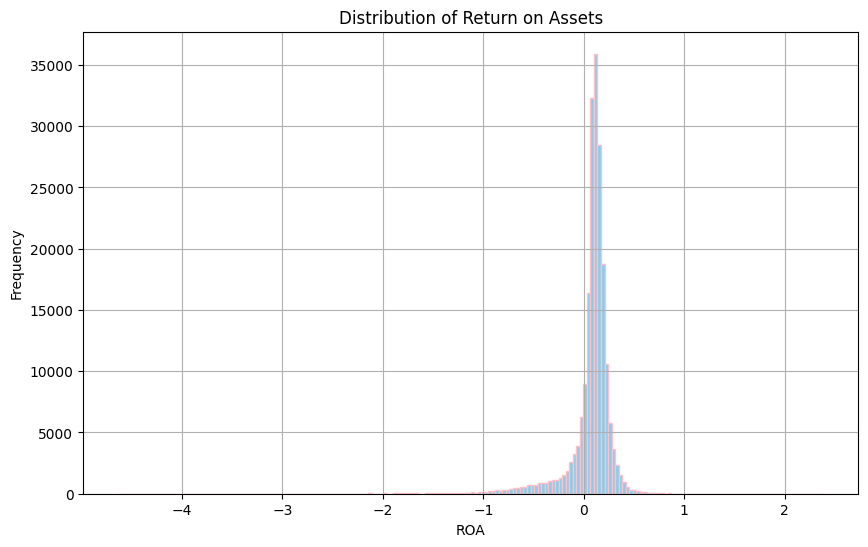

In [18]:
plt.figure(figsize=(10, 6))
cleaned_df['roa'].hist(bins=200, edgecolor='pink', color='skyblue')
plt.title('Distribution of Return on Assets')
plt.xlabel('ROA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Correlation between predictor variables and outcome variable

In [16]:
cleaned_df

opmad    gpm    roa  equity_invcap  debt_assets  \
conm       datadate                                                      
AAR CORP   2010-05-31  0.071  0.212  0.093          0.690        0.503   
           2010-05-31  0.071  0.212  0.093          0.690        0.503   
           2010-05-31  0.071  0.212  0.093          0.690        0.503   
           2010-05-31  0.077  0.186  0.078          0.694        0.477   
           2010-05-31  0.077  0.186  0.078          0.694        0.477   
...                      ...    ...    ...            ...          ...   
ARCOSA INC 2019-12-31  0.092  0.251  0.117          0.892        0.256   
           2019-12-31  0.092  0.251  0.117          0.892        0.256   
           2019-12-31  0.092  0.251  0.117          0.892        0.256   
           2019-12-31  0.091  0.255  0.116          0.879        0.275   
           2019-12-31  0.091  0.255  0.116          0.879        0.275   

                       cash_ratio  curr_ratio  cash_conversion  inv_turn  \
conm       datadate                                                        
AAR CORP   2010-05-31       0.244       2.652          192.779     2.188   
           2010-05-31       0.244       2.652          192.779     2.188   
           2010-05-31       0.244       2.652          192.779     2.188   
           2010-05-31       0.343       3.219          180.501     2.344   
           2010-05-31       0.343       3.219          180.501     2.344   
...                           ...         ...              ...       ...   
ARCOSA INC 2019-12-31       0.668       2.712           94.890     4.667   
           2019-12-31       0.668       2.712           94.890     4.667   
           2019-12-31       0.668       2.712           94.890     4.667   
           2019-12-31       0.670       2.563           89.413     4.814   
           2019-12-31       0.670       2.563           89.413     4.814   

                       at_turn    capx    oiadp    oibdp      sale     xacc  \
conm       datadate                                                           
AAR CORP   2010-05-31    0.939  28.855   95.415  134.345  1352.151  106.548   
           2010-05-31    0.939  28.855   95.415  134.345  1352.151  106.548   
           2010-05-31    0.939  28.855   95.415  134.345  1352.151  106.548   
           2010-05-31    0.972  28.855   95.415  134.345  1352.151  106.548   
           2010-05-31    0.972  28.855   95.415  134.345  1352.151  106.548   
...                        ...     ...      ...      ...       ...      ...   
ARCOSA INC 2019-12-31    0.774  85.400  154.900  240.700  1736.900  113.900   
           2019-12-31    0.774  85.400  154.900  240.700  1736.900  113.900   
           2019-12-31    0.774  85.400  154.900  240.700  1736.900  113.900   
           2019-12-31    0.760  85.400  154.900  240.700  1736.900  113.900   
           2019-12-31    0.760  85.400  154.900  240.700  1736.900  113.900   

                           xopr     naics  
conm       datadate                        
AAR CORP   2010-05-31  1217.806  423860.0  
           2010-05-31  1217.806  423860.0  
           2010-05-31  1217.806  423860.0  
           2010-05-31  1217.806  423860.0  
           2010-05-31  1217.806  423860.0  
...                         ...       ...  
ARCOSA INC 2019-12-31  1496.200  332312.0  
           2019-12-31  1496.200  332312.0  
           2019-12-31  1496.200  332312.0  
           2019-12-31  1496.200  332312.0  
           2019-12-31  1496.200  332312.0  

[201470 rows x 17 columns]

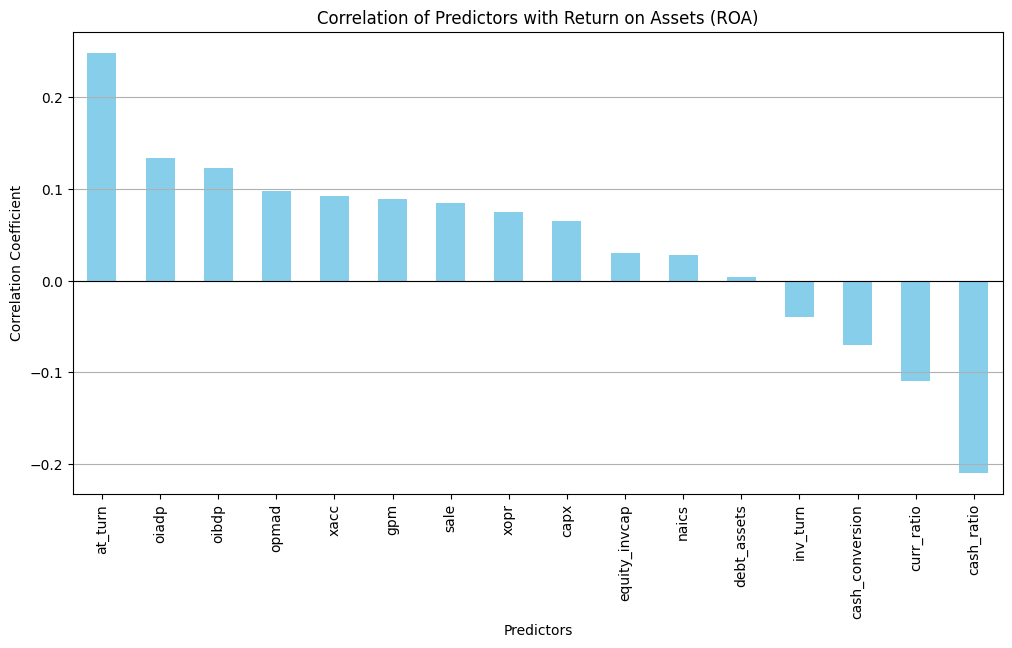

In [17]:
correlation_matrix = cleaned_df.corr()

# Step 2: Extract the correlations between 'roa' and the other predictors
roa_correlation = correlation_matrix['roa'].drop('roa').sort_values(ascending=False)

# Display the correlation values in a table
plt.figure(figsize=(12, 6))
roa_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Predictors with Return on Assets')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Predictors')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
plt.show()


## OLS regression data processing

We belive that the ROA of a given company can be predicted with the below estimators:
'opmad', 'gpm', 'roa', 'equity_invcap', 'debt_assets', 'cash_ratio', 'curr_ratio', 'cash_conversion', 'inv_turn', 'at_turn', 'datadate', 'capx', 'oiadp', 'oibdp', 'opincar', 'sale', 'uapt', 'xacc','xopr', 'xoprar', 'county', 'naics'

$$
\text{ROA} = \beta_0 + \beta_1 \text{opmad} + \beta_2 \text{gpm} + \beta_3 \text{equity\_invcap} + \beta_4 \text{debt\_assets} 
$$
$$
+ \beta_5 \text{cash\_ratio} + \beta_6 \text{curr\_ratio} + \beta_7 \text{cash\_conversion} + \beta_8 \text{inv\_turn} $$ 
$$+ \beta_9 \text{at\_turn} + \beta_{11} \text{capx} + \beta_{12} \text{oiadp} + \beta_{13} \text{oibdp} + \beta_{14} \text{opincar} + \beta_{15}$$ 
$$ \text{sale} + \beta_{16} \text{uapt} + \beta_{17} \text{xacc} + \beta_{18} \text{xopr} + \beta_{19} \text{xoprar} + \beta_{20} \text{county} + \beta_{21} \text{naics} + \epsilon
$$


Where
opmad: Operating Margin, representing profitability from core operations.


gpm: Gross Profit Margin, indicating the percentage of revenue that exceeds the cost of goods sold.


equity_invcap: Equity to Invested Capital Ratio, reflecting the proportion of equity in the capital structure.


debt_assets: Debt to Assets Ratio, indicating leverage levels. 


cash_ratio: Cash Ratio, measuring liquidity by comparing cash and equivalents to current liabilities.


curr_ratio: Current Ratio, assessing the ability to cover short-term obligations.


cash_conversion: Cash Conversion Cycle, indicating how quickly a company converts investments into cash flows.


inv_turn: Inventory Turnover Ratio, showing how efficiently inventory is managed.


at_turn: Asset Turnover Ratio, indicating how effectively assets generate sales.


sale: Total sales or revenue.


capx: Capital Expenditure, representing funds used for acquiring or upgrading assets.


oiadp: Operating Income After Depreciation, reflecting core profitability.


oibdp: Operating Income Before Depreciation.


xacc: Accruals, showing non-cash adjustments to earnings.


xopr: Operating Expenses.

In [19]:
## Change the dates to month and year - drop full date column
cleaned_df = cleaned_df.reset_index()
cleaned_df['month'] = cleaned_df['datadate'].dt.month
cleaned_df['day'] = cleaned_df['datadate'].dt.day
cleaned_df = cleaned_df.drop(columns=['datadate'])

In [32]:
merged_df.columns

Index(['opmad', 'gpm', 'roa', 'equity_invcap', 'debt_assets', 'cash_ratio',
       'curr_ratio', 'cash_conversion', 'inv_turn', 'at_turn', 'datadate',
       'conm', 'capx', 'oiadp', 'oibdp', 'opincar', 'sale', 'uapt', 'xacc',
       'xopr', 'xoprar', 'county', 'naics'],
      dtype='object')

In [21]:
# One-hot encode the "conm" column and remove other string columns

cleaned_df = pd.get_dummies(cleaned_df, columns=["conm"], dtype='int')
cleaned_df = cleaned_df.drop(cleaned_df.select_dtypes(['object']), axis=1)
cleaned_df

,opmad,gpm,roa,equity_invcap,debt_assets,cash_ratio,curr_ratio,cash_conversion,inv_turn,at_turn,...,conm_ZOETIS INC,conm_ZOGENIX INC,conm_ZOLL MEDICAL CORP,conm_ZOOM TECHNOLOGIES INC,conm_ZORAN CORP,conm_ZUMIEZ INC,conm_ZURN ELKAY WATER SOLUTI CORP,conm_ZW DATA ACTION TECHNOLGY INC,conm_ZYGO CORP,conm_ZYLA LIFE SCIENCES
0,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,0,0,0,0,0,0,0,0,0,0
1,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,0,0,0,0,0,0,0,0,0,0
2,0.071,0.212,0.093,0.690,0.503,0.244,2.652,192.779,2.188,0.939,...,0,0,0,0,0,0,0,0,0,0
3,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,...,0,0,0,0,0,0,0,0,0,0
4,0.077,0.186,0.078,0.694,0.477,0.343,3.219,180.501,2.344,0.972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201465,0.092,0.251,0.117,0.892,0.256,0.668,2.712,94.890,4.667,0.774,...,0,0,0,0,0,0,0,0,0,0
201466,0.092,0.251,0.117,0.892,0.256,0.668,2.712,94.890,4.667,0.774,...,0,0,0,0,0,0,0,0,0,0
201467,0.092,0.251,0.117,0.892,0.256,0.668,2.712,94.890,4.667,0.774,...,0,0,0,0,0,0,0,0,0,0
201468,0.091,0.255,0.116,0.879,0.275,0.670,2.563,89.413,4.814,0.760,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = cleaned_df.drop(columns=["roa", "month", "day"])
y = cleaned_df["roa"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     376.3
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:52:30   Log-Likelihood:             1.9662e+05
No. Observations:              201470   AIC:                        -3.873e+05
Df Residuals:                  198492   BIC:                        -3.569e+05
Df Model:                        2977                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [27]:
summary_table = pd.DataFrame({
    'Predictor': model.params.index,
    'Coefficient': model.params.values,
    'P-Value': model.pvalues.values,
    'Standard Error': model.bse.values,
    'Confidence Interval Lower': model.conf_int()[0],
    'Confidence Interval Upper': model.conf_int()[1]
})

# Display the table
summary_table

,Predictor,Coefficient,P-Value,Standard Error,Confidence Interval Lower,Confidence Interval Upper
const,const,-1871.845338,8.355505e-01,9017.095179,-19545.134903,15801.444227
opmad,opmad,0.000032,3.605243e-05,0.000008,0.000017,0.000048
gpm,gpm,0.000102,2.205492e-56,0.000006,0.000090,0.000115
equity_invcap,equity_invcap,0.000788,1.368536e-05,0.000181,0.000433,0.001143
debt_assets,debt_assets,-0.081141,0.000000e+00,0.001847,-0.084761,-0.077522
...,...,...,...,...,...,...
conm_ZUMIEZ INC,conm_ZUMIEZ INC,-169.801825,8.356391e-01,818.420485,-1773.886282,1434.282632
conm_ZURN ELKAY WATER SOLUTI CORP,conm_ZURN ELKAY WATER SOLUTI CORP,1870.458704,8.355424e-01,9009.967304,-15788.860396,19529.777805
conm_ZW DATA ACTION TECHNOLGY INC,conm_ZW DATA ACTION TECHNOLGY INC,-542.838285,8.356194e-01,2616.084218,-5670.300399,4584.623830
conm_ZYGO CORP,conm_ZYGO CORP,386.416549,8.355040e-01,1860.920778,-3260.943395,4033.776492


In [30]:
summary_table

,Predictor,Coefficient,P-Value,Standard Error,Confidence Interval Lower,Confidence Interval Upper
const,const,-1871.845338,8.355505e-01,9017.095179,-19545.134903,15801.444227
opmad,opmad,0.000032,3.605243e-05,0.000008,0.000017,0.000048
gpm,gpm,0.000102,2.205492e-56,0.000006,0.000090,0.000115
equity_invcap,equity_invcap,0.000788,1.368536e-05,0.000181,0.000433,0.001143
debt_assets,debt_assets,-0.081141,0.000000e+00,0.001847,-0.084761,-0.077522
...,...,...,...,...,...,...
conm_ZUMIEZ INC,conm_ZUMIEZ INC,-169.801825,8.356391e-01,818.420485,-1773.886282,1434.282632
conm_ZURN ELKAY WATER SOLUTI CORP,conm_ZURN ELKAY WATER SOLUTI CORP,1870.458704,8.355424e-01,9009.967304,-15788.860396,19529.777805
conm_ZW DATA ACTION TECHNOLGY INC,conm_ZW DATA ACTION TECHNOLGY INC,-542.838285,8.356194e-01,2616.084218,-5670.300399,4584.623830
conm_ZYGO CORP,conm_ZYGO CORP,386.416549,8.355040e-01,1860.920778,-3260.943395,4033.776492


### Regression results
We have filtered out all predictors with p-values less than 0.05, leaving only the predictors that are statistical significant.

The predictors with the largest absolute effects on ROA are at_turn, debt_assets, and cash_ratio. From the result, we can also categorize these predictors into positive predictors and negative predictors.

The predictors that are positively impacting the roa of a company are:
- opmad (Operating Margin): A small but significant positive coefficient (0.000032) indicates that higher operating margins are associated with slightly higher ROA.
- gpm (Gross Profit Margin): The positive coefficient (0.000102) suggests that as gross profit margins increase, so does ROA.
- equity_invcap (Equity to Invested Capital): A coefficient of 0.000788 implies that firms with higher equity relative to invested capital tend to have better ROA, as equity is associated with financial stability.
- cash_ratio and curr_ratio (Liquidity Ratios): Positive coefficients (0.004244 and 0.001998, respectively) highlight the importance of liquidity in driving better asset efficiency. This suggests firms with better liquidity management are more profitable.
- at_turn (Asset Turnover): The strongest positive predictor (0.114229), indicating that firms with higher asset turnover ratios significantly enhance ROA by efficiently using assets to generate revenue.

The negative predictors of ROA:

- debt_assets (Debt to Assets): A large negative coefficient (−0.081141) suggests that higher leverage (debt) significantly reduces ROA, as it increases financial risk and obligations.
- capx (Capital Expenditures): A small negative coefficient (−0.000006) indicates that higher capital expenditures slightly reduce ROA, potentially due to the upfront costs before returns materialize.
- xacc (Accruals): A small negative coefficient (−0.000003) suggests that larger accruals slightly diminish ROA, possibly reflecting earnings management practices.


In [25]:
significant_predictors = summary_table[summary_table['P-Value'] < 0.05]
print(significant_predictors)

                       Predictor  Coefficient       P-Value  Standard Error  \
opmad                      opmad     0.000032  3.605243e-05    7.859203e-06   
gpm                          gpm     0.000102  2.205492e-56    6.454350e-06   
equity_invcap      equity_invcap     0.000788  1.368536e-05    1.812090e-04   
debt_assets          debt_assets    -0.081141  0.000000e+00    1.846797e-03   
cash_ratio            cash_ratio     0.004244  2.844664e-19    4.728598e-04   
curr_ratio            curr_ratio     0.001998  3.533768e-07    3.923174e-04   
cash_conversion  cash_conversion     0.000007  1.096311e-85    3.811324e-07   
at_turn                  at_turn     0.114229  0.000000e+00    8.310614e-04   
capx                        capx    -0.000006  9.092444e-21    6.114787e-07   
oiadp                      oiadp     0.000008  1.853681e-11    1.155389e-06   
xacc                        xacc    -0.000003  2.368514e-03    1.062808e-06   

                 Confidence Interval Lower  Confide